<a href="https://colab.research.google.com/github/tirals88/pytorch-drl/blob/main/DRL_Chap3_1_CartPole_Error_Resolving.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

'PyTorch를 활용한 강화학습/심층강화학습 실전입문' 책 스터디 내용을 Google Colab으로 정리하여 올립니다.

Github 예제 코드 주소 : 'https://github.com/wikibook/pytorch-drl'

PyTorch를 활용한 강화학습/심층강화학습 실전입문

https://wikibook.co.kr/pytorch-drl/

## 3.2 역진자 태스크 CartPole

 ### CartPole 이란

 이전 장의 미로태스크 보다 복잡한 역진자를 제어하는 데 강화학습을 적용할 것이다.

 먼저 역진자 태스크의 실행 환경이 될 OpenAI GYM의 CartPole에 대한 설명이 필요하다.

 OpenAI는 테슬라 모터스나 스페이스 X로 익숙한 일론 머스크 등의 기부로 2015년 말 설립된 인공지능 연구를 목적으로 하는 조직이고 OpenAI Gym은 강화학스 ㅂ알고리즘을 구현해서 알고리즘간 성능을 비교하는 데 사용하는 실행 환경이다.

 역진자 태스크란 수레 위에 회전축을 고정한 봉을 세워두고, 수레를 좌우로 움직이며 이 봉이 쓰러지지 않도록 제어하는 과제를 말한다. 중심잡기를 하는 것과 같다.

 CartPole 은 OpenAI 에서도 매우 널리 사용되는 과제로 구현 코드는 다음과 같다.


In [3]:
# 구현에 사용할 패키지 임포트
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import gym

# 교재에서는 Anaconda를 설치한 후 가상환경 설정을 먼저 요구하지만 Colab으로만 작성해 볼 것이다.

# TypeError: CartPoleEnv.render() got an unexpected keyword argument 'mode'

# 1. 가상환경 설정 없이 교재 코드 그대로 작성 시 다음과 같은 에러가 먼저 발생한다.

# 2. 교재 내용은 2018년 5월 시점의 정보이며, OpenAI Gym 또한 2016년 4월에 발표된 실행 환경이므로 현재의 라이브러리 버전과 충돌을 일으킨다.

# 아래는 교재 코드 내용을 그대로 따라한 부분이다.

먼저 CartPole에서 수레의 모습을 애니메이션으로 재생하거나 저장할 함수인 display_frames_as gif를 정의한다.

In [26]:
# 애니메이션을 만드는 함수
# 참고 URL : https://github.com/patrickmineault/xcorr-notebooks/blob/master/notebooks/Render%20OpenAI%20gym%20as%20GIF.ipynb
!pip install JSAnimation
from JSAnimation.IPython_display import display_animation
from matplotlib import animation
from IPython.display import display

In [5]:
def display_frames_as_gif(frames):
  """
  Displays a list of frames as a gif, with controls
  """
  plt.figure(figsize=(frames[0].shape[1]/72.0, frames[0].shape[0]/72.0), dpi=72)
  patch = plt.imshow(frames[0])
  plt.axis('off')

  def animate(i):
    patch.set_data(frames[i])

  anim = animation.FuncAnimation(plt.gcf(), animate, frames=len(frames), interval=20)

  anim.save('movie_cartpole.mp4') #애니메이션을 저장하는 부분
  display(display_animation(anim, default_mode='loop'))

다음으로 CartPole을 실행하는 부분을 작성한다. 아직은 수레를 의도대로 제어하는 것이 아닌 무작위로 좌우로 움직이게만 하겠다. 일반적인 CartPole 태스크에서는 봉이 일정 각도 이상 기울어지면 종료되지만 지금은 종료시키지 않고 적당히 수레를 계속 움직이게 할 것이다.

In [7]:
# 수레를 무작위로 움직임

frames = []
env = gym.make('CartPole-v0')
observation = env.reset() #환경 초기화

for step in range(0, 200):
  frames.append(env.render(mode='rgb_array')) #frames 에 각 시각의 이미지 추가
  action = np.random.choice(2) # 0: 수레 왼쪽으로, 1: 수레를 오른쪽으로 두 가지 행동 중 무작위 선택
  observation, reward, done, info = env.step(action) # action 실행

TypeError: CartPoleEnv.render() got an unexpected keyword argument 'mode'

In [ ]:
# 애니메이션 저장 및 재생
display_frames_as_gif(frames)

# 먼저 해당 코드의 문제점을 찾던 중, OpenAI Gym 을 다룬 블로그를 발견

가상환경 설정 없이 실행한 코드여서 발생한 에러임을 확인할 수 있었던 블로그를 발견 했다.

해당 블로그에서는 동일하게 Colab을 사용하였고, 가상환경을 먼저 설정해준다. --> ('***대소기의 블로구***' : https://soki.tistory.com/68)

블로그를 인용하면 가상환경 설정을 먼저 하는 이유는 다음과 같다.

---

- "render() 메소드를 활용해 환경을 출력해야하지만 문제점이 하나 있다. CartPole 과 같은 환경들은 사용자의 display에 접근해 창을 띄워 환경에 대한 정보를 나타내야하는데, 우리가 사용하는 colab은 가상환경을 사용하는 headless server이다."

-  "... 즉, Xvfb는 우리가 사용할 cartpole 환경과 같이 screen과 같은 출력장치가 필요한 경우임에도 출력장치가 없는 headless server를 사용중일 때 가상적으로 framebuffer를 생성하여 마치 출력장치가 있는 서버를 사용하는 것과 같도록 소프트웨어적으로 구현해주는 역할을 한다."

- headless server란 그래픽 디스플레이 장치를 가지고 있지 않은 서버, 다시 말해 그래픽(연속된 메시지의 전달 등)을 컴퓨터로부터 화면에 시각적으로 표시해주는 장치인 디스플레이가 연결되어있지 않은 서버이다. (출처 및 인용 : 'http://fureweb.com/what-is-headless-server/')

***블로그를 따라 가상환경 구축***

In [ ]:
!apt update
!apt install -y xvfb #server install
import sys

IS_COLAB = "google.colab" in sys.modules

if IS_COLAB:
  !apt update && apt install -y libpq-dev libsdl2-dev swig xorg-dev xvfb
  %pip install -U tf-agents pyvirtualdisplay
  %pip install -U gym>=0.21.0
  %pip install -U gym[box2d,atari, accept-rom-license]

!xvfb-run -s "-screen 0 1400x900x24" jupyter notebook

Get:1 http://security.ubuntu.com/ubuntu jammy-security InRelease [110 kB]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Hit:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Get:4 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ Packages [50.4 kB]
Hit:5 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [119 kB]
Get:7 http://security.ubuntu.com/ubuntu jammy-security/restricted amd64 Packages [1,894 kB]
Get:8 http://security.ubuntu.com/ubuntu jammy-security/main amd64 Packages [1,522 kB]
Get:9 http://security.ubuntu.com/ubuntu jammy-security/universe amd64 Packages [1,074 kB]
Hit:10 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Hit:11 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:12 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:13 http://archive.ub

ERROR: Operation cancelled by user
ERROR: Invalid requirement: 'gym[box2d,atari,'
|DEBUG|Paths used for configuration of jupyter_notebook_config: 
    	/etc/jupyter/jupyter_notebook_config.json
|DEBUG|Paths used for configuration of jupyter_notebook_config: 
    	/usr/local/etc/jupyter/jupyter_notebook_config.d/panel-client-jupyter.json
    	/usr/local/etc/jupyter/jupyter_notebook_config.json
|DEBUG|Paths used for configuration of jupyter_notebook_config: 
    	/usr/etc/jupyter/jupyter_notebook_config.json
|DEBUG|Paths used for configuration of jupyter_notebook_config: 
    	/root/.local/etc/jupyter/jupyter_notebook_config.json
|DEBUG|Paths used for configuration of jupyter_notebook_config: 
    	/root/.jupyter/jupyter_notebook_config.json

  _   _          _      _
 | | | |_ __  __| |__ _| |_ ___
 | |_| | '_ \/ _` / _` |  _/ -_)
  \___/| .__/\__,_\__,_|\__\___|
       |_|
                       
Read the migration plan to Notebook 7 to learn about the new features and the actions to t

- 여기서 세션을 다시 불러온 후, 윗 코드 호출 X

In [6]:
try:
  import pyvirtualdisplay
  display = pyvirtualdisplay.Display(visible=0, size=(1400, 900)).start()

except ImportError:
  pass

In [3]:
import gym
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
env = gym.make('CartPole-v1')
env.seed(42)
obs=env.reset()
obs

array([ 0.0273956 , -0.00611216,  0.03585979,  0.0197368 ], dtype=float32)

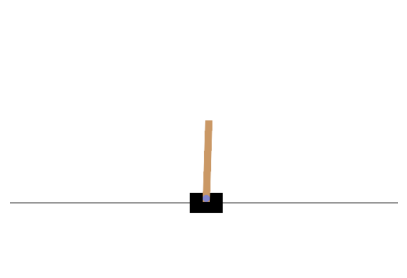

In [6]:
def plot_environment(env, figsize=(5, 4)):
  plt.figure(figsize=figsize)
  img=env.render(mode='rgb_array')
  plt.imshow(img)
  plt.axis('off')
  return img

plot_environment(env)
plt.show()

# 앞서 발생한 [TypeError: CartPoleEnv.render() got an unexpected keyword argument 'mode'] 가 해결된 모습 확인


다시 코드를 불러오자

In [8]:
# 수레를 무작위로 움직임

frames = []
env = gym.make('CartPole-v0')
observation = env.reset() #환경 초기화

for step in range(0, 200):
  frames.append(env.render(mode='rgb_array')) #frames 에 각 시각의 이미지 추가
  action = np.random.choice(2) # 0: 수레 왼쪽으로, 1: 수레를 오른쪽으로 두 가지 행동 중 무작위 선택
  observation, reward, done, info = env.step(action) # action 실행

/usr/local/lib/python3.10/dist-packages/gym/envs/registration.py:505: UserWarning: WARN: The environment CartPole-v0 is out of date. You should consider upgrading to version `v1` with the environment ID `CartPole-v1`.
  logger.warn(
/usr/local/lib/python3.10/dist-packages/gym/envs/classic_control/cartpole.py:163: UserWarning: WARN: You are calling 'step()' even though this environment has already returned done = True. You should always call 'reset()' once you receive 'done = True' -- any further steps are undefined behavior.
  logger.warn(


In [11]:
# 애니메이션 저장 및 재생
display_frames_as_gif(frames)

TypeError: FileMovieWriter.setup() got an unexpected keyword argument 'clear_temp'

### 또 다른 error 발생

#TypeError: FileMovieWriter.setup() got an unexpected keyword argument 'clear_temp'

https://matplotlib.org/stable/api/prev_api_changes/api_changes_3.5.0.html

- Matplotlib  : API Changes for 3.5.0 :

The clear_temp parameter of FileMovieWriter has been removed; files placed in a temporary directory (using frame_prefix=None, the default) will be cleared; files placed elsewhere will not.

Matplotlib version 3.5.0 부터 해당 parameter가 삭제되었음을 알 수 있다.

# ***그리고 현재 버전***

In [12]:
import matplotlib

In [13]:
print(matplotlib.__version__)

3.7.1


In [14]:
# matplotlib -downgrade

!pip install matplotlib==3.4.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.3/37.3 MB 25.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for matplotlib: filename=matplotlib-3.4.2-cp310-cp310-linux_x86_64.whl size=10437135 sha256=e93216292a3ad5805298e1b57655af7f7125e3cce547098130bebd2e0542a820
  Stored in directory: /root/.cache/pip/wheels/d9/e8/73/f806fc40c211022378c2828e3cce1eac412344111ab1becd9d
Successfully built matplotlib
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.7.1
    Uninstalling matplotlib-3.7.1:
      Successfully uninstalled matplotlib-3.7.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
mizani 0.9.3 requires matplotlib>=3.5.0, but you have matplotlib 3.4.2 which is incompatible.
plotnine 0.12.4 requires matplotlib>=3.6.0, but you have matplotlib 3.4.2 which is incompatible.


- 여기서 세션을 다시 불러온 후, 윗 코드 호출 X

In [1]:
import matplotlib

In [2]:
print(matplotlib.__version__)

3.4.2


matplotlib version 이 3.5.0 이전으로 다운그레이드 되었음을 확인한 후 다시 해당 코드를 불러본다. (가상환경 구축코드와 다운그레이드 코드를 제외한, 중복되지 않게 라이브러리 호출)

In [7]:
# 수레를 무작위로 움직임

frames = []
env = gym.make('CartPole-v0')
observation = env.reset() #환경 초기화

for step in range(0, 200):
  frames.append(env.render(mode='rgb_array')) #frames 에 각 시각의 이미지 추가
  action = np.random.choice(2) # 0: 수레 왼쪽으로, 1: 수레를 오른쪽으로 두 가지 행동 중 무작위 선택
  observation, reward, done, info = env.step(action) # action 실행

/usr/local/lib/python3.10/dist-packages/gym/envs/registration.py:505: UserWarning: WARN: The environment CartPole-v0 is out of date. You should consider upgrading to version `v1` with the environment ID `CartPole-v1`.
  logger.warn(
/usr/local/lib/python3.10/dist-packages/gym/envs/classic_control/cartpole.py:163: UserWarning: WARN: You are calling 'step()' even though this environment has already returned done = True. You should always call 'reset()' once you receive 'done = True' -- any further steps are undefined behavior.
  logger.warn(


In [8]:
# 애니메이션 저장 및 재생
display_frames_as_gif(frames)

/usr/local/lib/python3.10/dist-packages/JSAnimation/html_writer.py:281: MatplotlibDeprecationWarning: 
The 'clear_temp' parameter of setup() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. If any parameter follows 'clear_temp', they should be passed as keyword, not positionally.
  super(HTMLWriter, self).setup(fig, outfile, dpi,


AttributeError: 'HTMLWriter' object has no attribute '_temp_names'

### 또 다른 error 발생 2

#AttributeError: 'HTMLWriter' object has no attribute '_temp_names'

https://blog.csdn.net/weixin_45854758/article/details/127096962

- 중국인의 블로그에서 해결책 발견후 해당 코드로 수정
- JSAnimation.IPtyon_display 에서 호출한 display_animation 함수를 사용하지 않고, 새로 정의한 함수 사용

# ***수정된 코드***

In [28]:
#새로 정의한 display_animtaion 함수

from IPython.display import HTML

def display_animation(anim):
  return HTML(anim.to_jshtml())

In [37]:
def display_frames_as_gif(frames):
  """
  Displays a list of frames as a gif, with controls
  """
  plt.figure(figsize=(frames[0].shape[1]/48.0, frames[0].shape[0]/48.0), dpi=72)
  patch = plt.imshow(frames[0])
  plt.axis('off')

  def animate(i):
    patch.set_data(frames[i])

  anim = animation.FuncAnimation(plt.gcf(), animate, frames=len(frames), interval=20)

  anim.save('movie_cartpole.mp4') #애니메이션을 저장하는 부분
  display(display_animation(anim)) #수정된 부분

In [39]:
# 수레를 무작위로 움직임
frames = []
env = gym.make('CartPole-v1')
observation = env.reset() #환경 초기화

for step in range(0, 200):
  frames.append(env.render(mode='rgb_array')) #frames 에 각 시각의 이미지 추가
  action = np.random.choice(2) # 0: 수레 왼쪽으로, 1: 수레를 오른쪽으로 두 가지 행동 중 무작위 선택
  observation, reward, done, info = env.step(action) # action 실행

/usr/local/lib/python3.10/dist-packages/gym/envs/classic_control/cartpole.py:163: UserWarning: WARN: You are calling 'step()' even though this environment has already returned done = True. You should always call 'reset()' once you receive 'done = True' -- any further steps are undefined behavior.
  logger.warn(


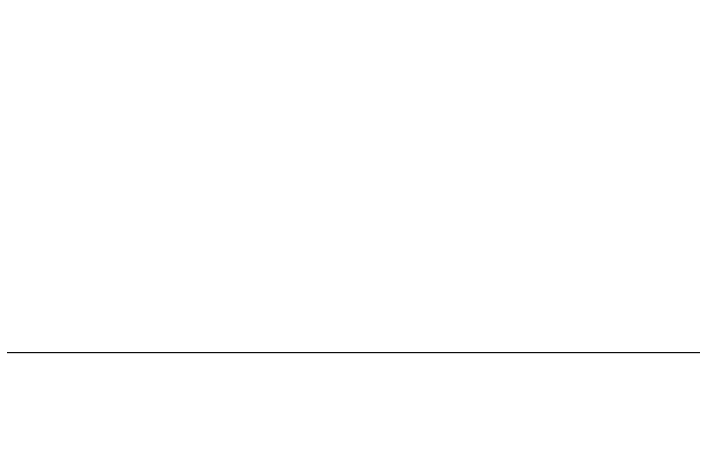

In [40]:
# 애니메이션 저장 및 재생
display_frames_as_gif(frames)

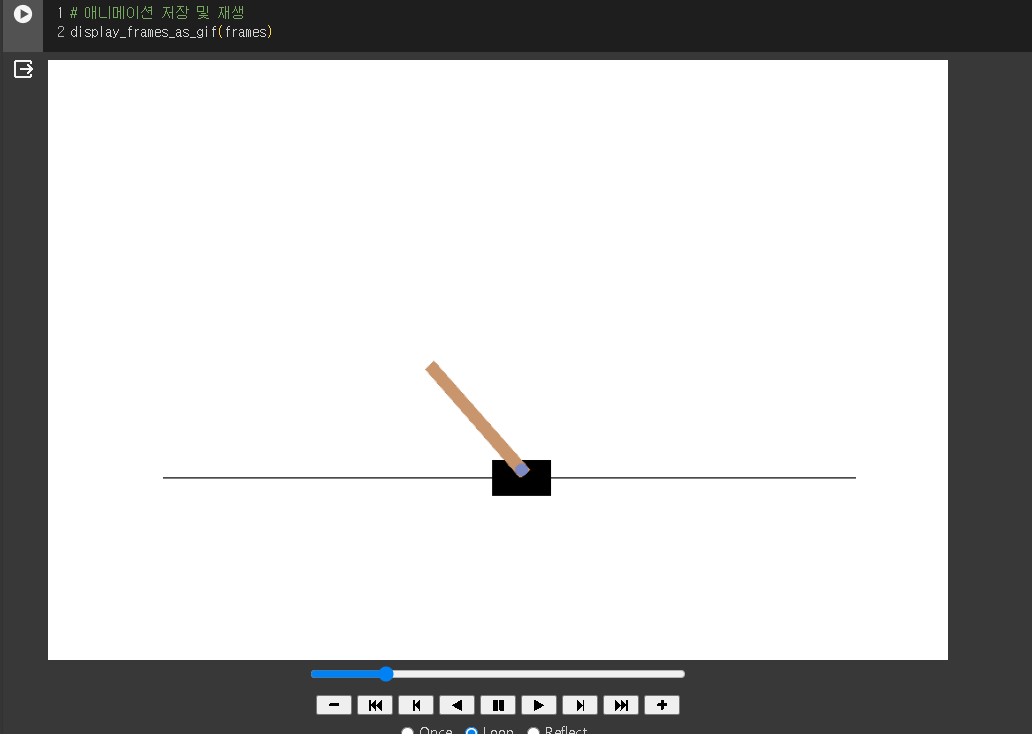

# ***드디어 작동 !***

frames[-1]의 이미지, 즉 애니메이션의 마지막 장면이 다음과 같이 호출되는 오류는 교재에서 ipykernel_launcher.py가 켜지는 것과 같은 오류인지는 모르겠지만 고치지 못하였음